# Convex Optimization for Machine Learning & Computer Vision
## Week 2 Programming Exercise - Inpainting

| Name  | Matriculation Number  | E-mail  |
| :------- | :----------------------- | :--------- |
| Akbar, Uzair   | 03697290 | [uzair.akbar@tum.de](mailto:uzair.akbar@tum.de) |

***

In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse import linalg as splinalg
import matplotlib.pyplot as plt
from PIL import Image

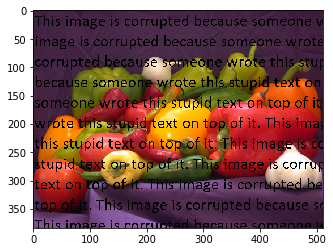

In [2]:
# read the image and the mask from input files
f = np.array(Image.open('corrupted.png'), dtype=np.float64)
ny, nx, c = f.shape
N = nx * ny * c

plt.figure('Corrupted')
plt.imshow(f / 255.0)
plt.show()

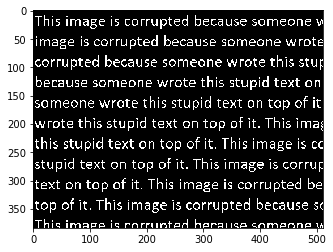

In [3]:
# mask(i,j) = 1 iff pixel (i,j) is corrupted.
mask = (np.array(Image.open('mask.png')) == 0)

plt.figure('Mask')
plt.imshow(mask * 1.0, cmap='gray')
plt.show()

In [4]:
# vectorize image and mask as in exercise 0
f=f.T.flatten()
mask = mask.T.flatten()

In [5]:
# %%
# count corrupted pixelsshow
M = np.sum(mask)

In [6]:
# construct a sparse linear operator for the color gradient as in exercise 0
e1 = np.ones(ny)
e0 = -np.ones(ny)
e0[-1] = 0
Dy_tilde = sparse.spdiags([e0, e1], [0, 1], ny, ny)
Dy = sparse.kron(sparse.eye(nx), Dy_tilde)
e_1 = np.ones(nx)
e0 = -np.ones(nx)
e0[-1] = 0
Dx_tilde = sparse.spdiags([e_1, e0], [-1, 0], nx, nx)
Dx = sparse.kron(Dx_tilde.T, sparse.eye(ny))
Nabla_col = sparse.vstack([sparse.kron(sparse.eye(3), Dx),
                           sparse.kron(sparse.eye(3), Dy)])

In [7]:
# %%
# Let u_tilde be the vector containing only the unknown pixels that we
# optimize for and let u be the whole image that we are looking for.
# Construct operators X, Y s.t. u=X*u_tilde + Y*f is the reconstructed image.
X = sparse.coo_matrix((np.ones(M), (np.nonzero(mask)[0], np.arange(M))),
                      shape=(N, M))
Y = sparse.spdiags([1.0 - mask], [0], N, N)

In [8]:
# Construct a least squares problem min_{u_tilde} F(u_tilde)
# with F(u_tilde)=|| A * u_tilde - b ||^2
A = Nabla_col * X
b = -Nabla_col * Y * f

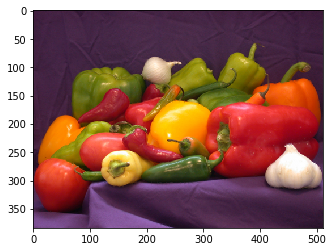

In [9]:
# %% solve
# Solve least squares problem via first order optimality condition:
# \nabla F(x) = 0
u_tilde = splinalg.spsolve(A.T * A, A.T * b)
# Inpaint unknown pixels in f
u = X * u_tilde + Y * f

plt.figure('Impainting')
plt.imshow(u.reshape(c, nx, ny).T / np.max(u))
plt.show()

***